# Reading all the data set files

## Data set 1- Iot Data with different features of machine

In [1]:
import pandas as pd
import numpy as np

In [2]:
from datetime import datetime

In [3]:
d1=pd.read_csv("data_set1.csv")#,header=0, names=["datetime"," machineID","volt","rotate", "pressure","vibration"])
print(d1.head())
print(d1.dtypes)

           datetime  machineID        volt      rotate    pressure  vibration
0  01/01/2015 06:00          1  176.217853  418.504078  113.077935  45.087686
1  01/01/2015 07:00          1  162.879223  402.747490   95.460525  43.413973
2  01/01/2015 08:00          1  170.989902  527.349825   75.237905  34.178847
3  01/01/2015 09:00          1  162.462833  346.149335  109.248561  41.122144
4  01/01/2015 10:00          1  157.610021  435.376873  111.886648  25.990511
datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object


In [4]:
# Chaniging the format of datetime
d1["datetime"]= pd.to_datetime((d1['datetime']))
print(d1.tail())
d1.describe()

                  datetime  machineID        volt      rotate    pressure  \
876095 2016-01-01 02:00:00        100  179.438162  395.222827  102.290715   
876096 2016-01-01 03:00:00        100  189.617555  446.207972   98.180607   
876097 2016-01-01 04:00:00        100  192.483414  447.816524   94.132837   
876098 2016-01-01 05:00:00        100  165.475310  413.771670  104.081073   
876099 2016-01-01 06:00:00        100  171.336037  496.096870   79.095538   

        vibration  
876095  50.771941  
876096  35.123072  
876097  48.314561  
876098  44.835259  
876099  37.845245  


machineID           volt         rotate       pressure  \
count  876100.000000  876100.000000  876100.000000  876100.000000   
mean       50.500000     170.777736     446.605119     100.858668   
std        28.866087      15.509114      52.673886      11.048679   
min         1.000000      97.333604     138.432075      51.237106   
25%        25.750000     160.304927     412.305714      93.498181   
50%        50.500000     170.607338     447.558150     100.425559   
75%        75.250000     181.004493     482.176600     107.555231   
max       100.000000     255.124717     695.020984     185.951998   

           vibration  
count  876100.000000  
mean       40.385007  
std         5.370361  
min        14.877054  
25%        36.777299  
50%        40.237247  
75%        43.784938  
max        76.791072

In [5]:
d1[d1.duplicated()==True]   #To check if there is any duplicated values in the rowws of the dataframe

Empty DataFrame
Columns: [datetime, machineID, volt, rotate, pressure, vibration]
Index: []

### Basic Analysis on data set 1

In [6]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

{'whiskers': [<matplotlib.lines.Line2D at 0x1f893b1f198>,
 'caps': [<matplotlib.lines.Line2D at 0x1f893b1f828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f893b0ddd8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f893b1feb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f893b30240>],
 'means': []}

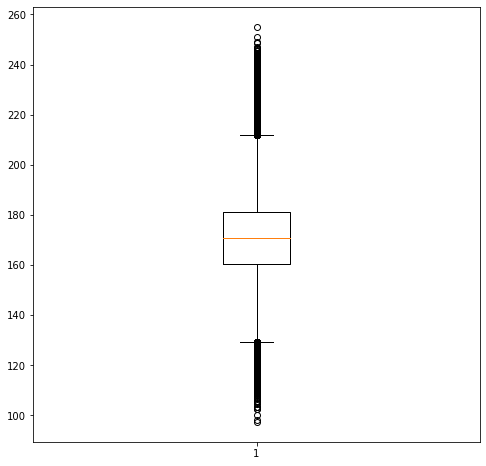

In [89]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.boxplot(d1['volt'])


In [90]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
# import chart_studio.plotly as py
import plotly.graph_objs as go

In [92]:
#Offline mode
from  plotly.offline import plot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode()

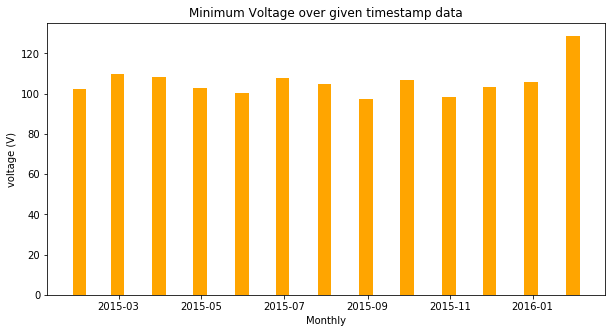

In [93]:
per_month = d1.set_index('datetime').groupby(pd.Grouper(freq='M'))['volt'].min()

x = per_month.index
y = per_month.values

fig = plt.figure(figsize = (10, 5)) 
plt.bar(x, y, color ='orange', width=10) 
  
plt.xlabel("Monthly") 
plt.ylabel("voltage (V)") 
plt.title("Minimum Voltage over given timestamp data") 
plt.show() 

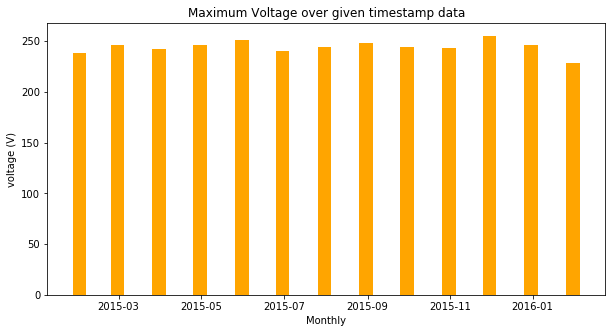

In [94]:
per_month = d1.set_index('datetime').groupby(pd.Grouper(freq='M'))['volt'].max()

x = per_month.index
y = per_month.values

fig = plt.figure(figsize = (10, 5)) 
plt.bar(x, y, color ='orange', width=10) 
  
plt.xlabel("Monthly") 
plt.ylabel("voltage (V)") 
plt.title("Maximum Voltage over given timestamp data") 
plt.show() 

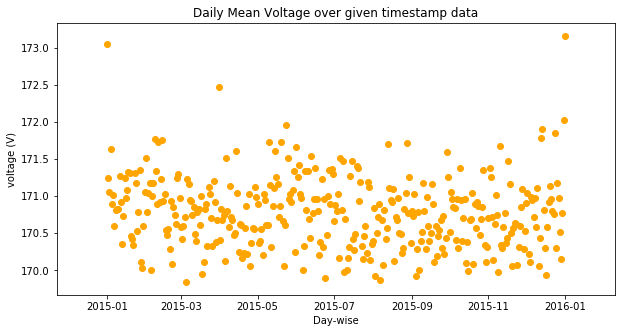

In [95]:
per_month = d1.set_index('datetime').groupby(pd.Grouper(freq='D'))['volt'].mean()

x = per_month.index
y = per_month.values

fig = plt.figure(figsize = (10, 5)) 
plt.scatter(x, y, color ='orange') 
  
plt.xlabel("Day-wise") 
plt.ylabel("voltage (V)") 
plt.title("Daily Mean Voltage over given timestamp data") 
plt.show() 

In [96]:
d1.head()

datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511

# Grouping data & plots

In [7]:
df = d1.groupby(["machineID"])["volt"].max() # grouping by machineID & maximum 
                                        #voltage ever recorded by that machine 
df

machineID
1      237.938518
2      235.114772
3      234.950829
4      241.516461
5      228.298139
          ...    
96     233.712717
97     227.250202
98     236.510251
99     235.001645
100    243.686972
Name: volt, Length: 100, dtype: float64

In [98]:
volt_data = go.Scatter(x= df.index,
                         y= df.values)

layout = go.Layout(title='Maximum Voltage of each machine', xaxis=dict(title='machine-ID'),
                   yaxis=dict(title='Max Voltage (V)'))

fig = go.Figure(data=[volt_data], layout=layout)

In [99]:
iplot(fig)

In [8]:
df1=d1.groupby(["machineID"])["volt"].min()# grouping by machineID & mininum 
                                     #voltage ever recorded by that machine 
df1

machineID
1      119.059047
2      112.486614
3      121.894460
4      100.194137
5      119.702416
          ...    
96     112.008342
97     103.420791
98     117.104639
99     115.374750
100    118.185929
Name: volt, Length: 100, dtype: float64

In [101]:
volt_data = go.Scatter(x= df1.index,
                         y= df1.values)

layout = go.Layout(title='Minimum Voltage of each machine', xaxis=dict(title='machine-ID'),
                   yaxis=dict(title='Min Voltage (V)'))

fig = go.Figure(data=[volt_data], layout=layout)

In [102]:
iplot(fig)

In [9]:
df2=d1.groupby(["datetime"])["volt"].mean()
df2.head()

datetime
2015-01-01 06:00:00    172.107235
2015-01-01 07:00:00    173.498931
2015-01-01 08:00:00    172.172429
2015-01-01 09:00:00    172.778453
2015-01-01 10:00:00    174.827795
Name: volt, dtype: float64

In [104]:
volt_data = go.Scatter(x= df2.index,
                         y= df2.values)

layout = go.Layout(title='Mean voltage recorded over time', xaxis=dict(title='date'),
                   yaxis=dict(title='Mean voltage (V)'))

fig = go.Figure(data=[volt_data], layout=layout)

In [105]:
iplot(fig)

In [10]:
df3=d1.groupby(["machineID"])["pressure"].max()
df3

machineID
1      155.257527
2      150.848378
3      153.600538
4      152.052407
5      182.111770
          ...    
96     153.772799
97     151.859566
98     162.828655
99     154.095588
100    151.824772
Name: pressure, Length: 100, dtype: float64

In [107]:
volt_data = go.Scatter(x= df3.index,
                         y= df3.values)

layout = go.Layout(title='Maximum pressure in each machine', xaxis=dict(title='MachineID'),
                   yaxis=dict(title='Max pressure (Pa)'))

fig = go.Figure(data=[volt_data], layout=layout)

In [108]:
iplot(fig)

### Box plot

In [28]:
box_plot_p = d1.pressure

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8ca8ef978>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8ca9af048>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8ca8ef668>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8ca9af6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8ca9afa20>],
 'means': []}

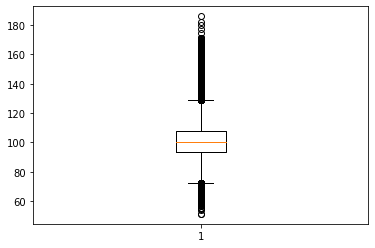

In [29]:
plt.boxplot(box_plot_p)

{'whiskers': [<matplotlib.lines.Line2D at 0x1f8caa281d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8caa28828>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8caa3fe10>],
 'medians': [<matplotlib.lines.Line2D at 0x1f8caa28eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f8caa19240>],
 'means': []}

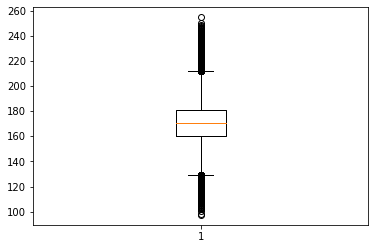

In [30]:
box_plot_v = d1.volt
plt.boxplot(box_plot_v)

In [ ]:
import plotly.express as px

fig1 = px.imshow(d1)
fig1

# Statistics on Data 1

In [34]:
d1.head()

datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511

In [16]:
d1.columns

Index(['datetime', 'machineID', 'volt', 'rotate', 'pressure', 'vibration'], dtype='object')

## with datetime as index


In [11]:
print(d1.head())
print(d1.shape)

             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  
(876100, 6)


In [12]:
d1_1 = d1.set_index('datetime')
d1_1

machineID        volt      rotate    pressure  vibration
datetime                                                                     
2015-01-01 06:00:00          1  176.217853  418.504078  113.077935  45.087686
2015-01-01 07:00:00          1  162.879223  402.747490   95.460525  43.413973
2015-01-01 08:00:00          1  170.989902  527.349825   75.237905  34.178847
2015-01-01 09:00:00          1  162.462833  346.149335  109.248561  41.122144
2015-01-01 10:00:00          1  157.610021  435.376873  111.886648  25.990511
...                        ...         ...         ...         ...        ...
2016-01-01 02:00:00        100  179.438162  395.222827  102.290715  50.771941
2016-01-01 03:00:00        100  189.617555  446.207972   98.180607  35.123072
2016-01-01 04:00:00        100  192.483414  447.816524   94.132837  48.314561
2016-01-01 05:00:00        100  165.475310  413.771670  104.081073  44.835259
2016-01-01 06:00:00        100  171.336037  496.096870   79.095538  37.845245

[876100 rows x 5 columns]

### Aggregation of data

Resampling Month wise 

Weekly mean 

In [14]:
d_columns = ["volt","rotate","pressure","vibration"]
data_W_mean = d1_1[d_columns].resample('W').mean()
data_W_mean.head()

volt      rotate    pressure  vibration
datetime                                                 
2015-01-04  171.661695  444.652377  101.235210  40.372607
2015-01-11  170.894342  445.494693  101.009208  40.486081
2015-01-18  170.951684  445.903765  100.870261  40.424891
2015-01-25  170.799506  447.554132  100.958589  40.339096
2015-02-01  170.778306  447.073124  100.982979  40.366284

Monthly mean 

In [15]:
d_columns = ["volt","rotate","pressure","vibration"]
data_M_mean = d1_1[d_columns].resample('M').mean()
data_M_mean.head()

volt      rotate    pressure  vibration
datetime                                                 
2015-01-31  170.932553  446.337269  100.997865  40.389863
2015-02-28  170.964516  446.469226  100.963248  40.346444
2015-03-31  170.746041  446.758270  100.823977  40.447344
2015-04-30  170.671862  445.943704  100.715289  40.417331
2015-05-31  170.921214  446.481680  100.773784  40.443858

### Rolling Window

In [16]:
d_columns = ["volt","rotate","pressure","vibration"]
data_7d_rol = d1_1[d_columns].rolling(window = 7, center = True).mean()
data_7d_rol.head(10)

volt      rotate    pressure  vibration
datetime                                                          
2015-01-01 06:00:00         NaN         NaN         NaN        NaN
2015-01-01 07:00:00         NaN         NaN         NaN        NaN
2015-01-01 08:00:00         NaN         NaN         NaN        NaN
2015-01-01 09:00:00  165.602958  437.074655  101.799186  38.314585
2015-01-01 10:00:00  165.075090  435.806175  100.073921  36.942346
2015-01-01 11:00:00  166.852990  435.220645  102.240183  37.237819
2015-01-01 12:00:00  166.599922  425.720766  106.470230  38.055375
2015-01-01 13:00:00  167.256800  430.911367  105.689101  38.277326
2015-01-01 14:00:00  167.635933  432.726707  103.488291  40.070636
2015-01-01 15:00:00  164.900026  441.348073  102.071919  41.278284

Text(0.5, 1.0, 'Trend in Mean Voltage over time')

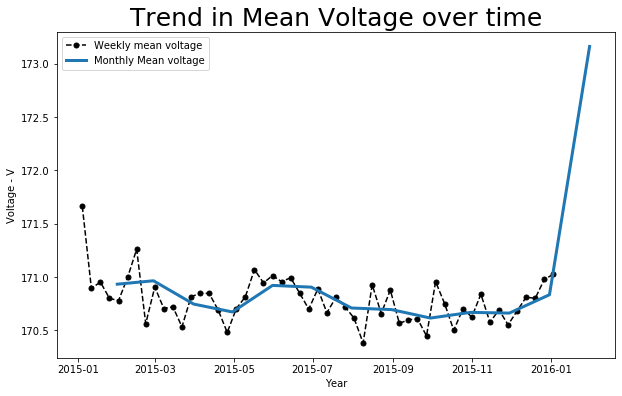

In [99]:
# plotting Weekly mean data

fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data_W_mean['volt'], marker='.', markersize=10, color='0',
        linestyle='dashed', label='Weekly mean voltage')

#Monthly mean
ax.plot(data_M_mean['volt'], linewidth=3, label='Monthly Mean voltage')

# Beautification of plot
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Voltage - V')
ax.set_title('Trend in Mean Voltage over time', size=25)

Text(0.5, 1.0, 'Trend in Mean Rotation over time')

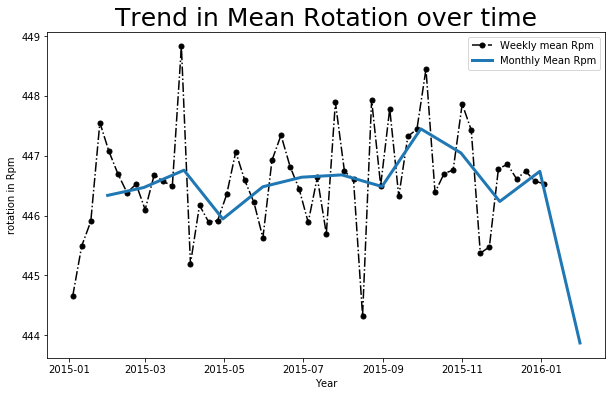

In [105]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data_W_mean['rotate'], marker='.', markersize=10, color='0',
        linestyle='dashdot', label='Weekly mean Rpm')

#Monthly mean
ax.plot(data_M_mean['rotate'], linewidth=3, label='Monthly Mean Rpm')

# Beautification of plot
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('rotation in Rpm')
ax.set_title('Trend in Mean Rotation over time', size=25)

Text(0.5, 1.0, 'Trend in Mean pressure over time')

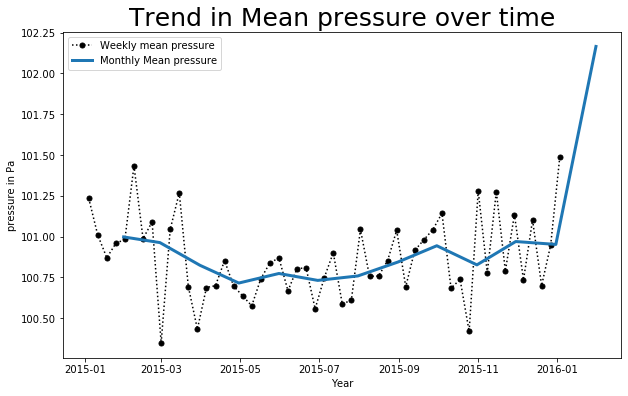

In [106]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data_W_mean['pressure'], marker='.', markersize=10, color='0',
        linestyle='dotted', label='Weekly mean pressure')

#Monthly mean
ax.plot(data_M_mean['pressure'], linewidth=3, label='Monthly Mean pressure')

# Beautification of plot
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('pressure in Pa')
ax.set_title('Trend in Mean pressure over time', size=25)

Text(0.5, 1.0, 'Trend in Mean vibration over time')

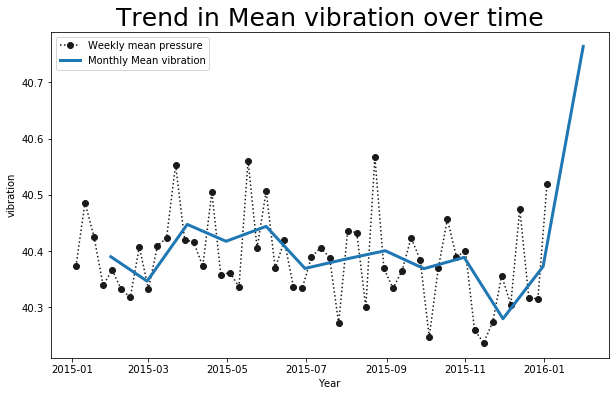

In [104]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data_W_mean['vibration'], marker='.', markersize=12, color='0.1',
        linestyle='dotted', label='Weekly mean pressure')

#Monthly mean
ax.plot(data_M_mean['vibration'], linewidth=3, label='Monthly Mean vibration')

# Beautification of plot
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('vibration')
ax.set_title('Trend in Mean vibration over time', size=25)

## All in one graph

### ___For Weekly trend___

Text(0.5, 1.0, 'Trend in weekly Mean of respective values over time')

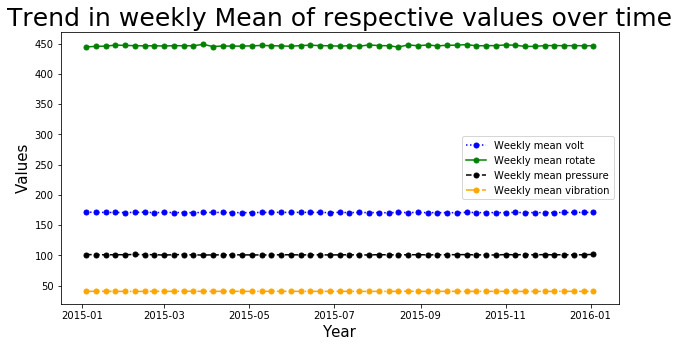

In [144]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(data_W_mean['volt'], marker='.', markersize=10, color='blue',
        linestyle='dotted', label='Weekly mean volt')

ax.plot(data_W_mean['rotate'], marker='.', markersize=10, color='green',
        linestyle='solid', label='Weekly mean rotate')

ax.plot(data_W_mean['pressure'], marker='.', markersize=10, color='black',
        linestyle='dashed', label='Weekly mean pressure')


ax.plot(data_W_mean['vibration'], marker='.', markersize=10, color='orange',
        linestyle='dashdot', label='Weekly mean vibration')

# Beautification of plot
ax.legend()
ax.set_xlabel('Year',size=15)
ax.set_ylabel('Values',size=15)
ax.set_title('Trend in weekly Mean of respective values over time', size=25)

### ___For Monthly trend___

Text(0.5, 1.0, 'Trend in Monthly Mean of respective values over time')

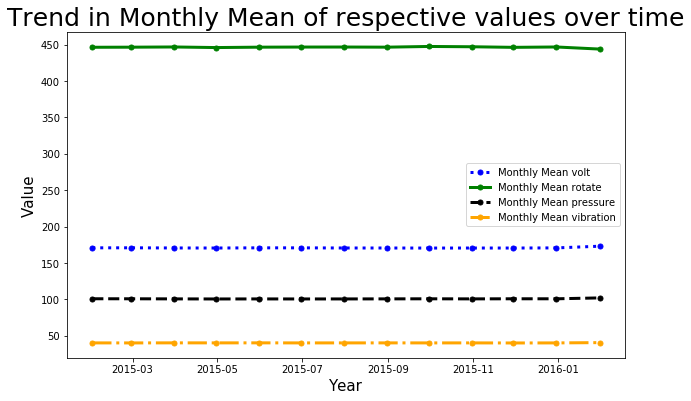

In [145]:
# #Monthly mean
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data_M_mean['volt'], marker='.', markersize=10, color='blue',
        linestyle='dotted', linewidth=3, label='Monthly Mean volt')
    
ax.plot(data_M_mean['rotate'],marker='.', markersize=10, color='green',
        linestyle='solid', linewidth=3, label='Monthly Mean rotate')

ax.plot(data_M_mean['pressure'],marker='.', markersize=10, color='black',
        linestyle='dashed', linewidth=3, label='Monthly Mean pressure')
    
ax.plot(data_M_mean['vibration'], marker='.', markersize=10, color='orange',
        linestyle='dashdot',linewidth=3, label='Monthly Mean vibration')

# Beautification of plot
ax.legend()
ax.set_xlabel('Year', size=15)
ax.set_ylabel('Value', size=15)
ax.set_title('Trend in Monthly Mean of respective values over time', size=25)

## Check for trend from time series & remove if any


Differencing is super helpful in turning your time series into a stationary time series.


In [14]:
d1.head()

datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511

In [15]:
# creating the first order differencing data
data_first_order_diff = d1_1[d_columns].diff()
data_first_order_diff.head()

volt      rotate   pressure  vibration
datetime                                                        
2015-01-01 06:00:00        NaN         NaN        NaN        NaN
2015-01-01 07:00:00 -13.338630  -15.756589 -17.617410  -1.673713
2015-01-01 08:00:00   8.110680  124.602336 -20.222621  -9.235126
2015-01-01 09:00:00  -8.527069 -181.200490  34.010656   6.943297
2015-01-01 10:00:00  -4.852812   89.227538   2.638087 -15.131633

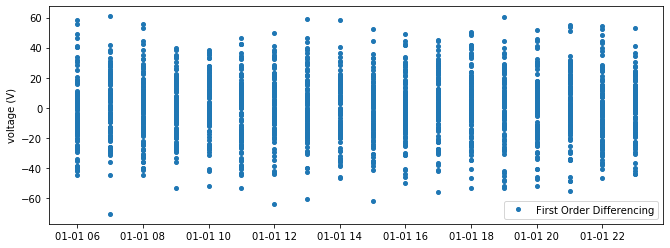

In [210]:
start, end = '2015-01-01 06:00:00', '2015-01-01 23:00:00'
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(figsize=(11, 4))

ax.plot(data_first_order_diff.loc[start:end, 'volt'],
marker='o', markersize=4, linestyle='', label='First Order Differencing')
ax.set_ylabel('voltage (V)')
ax.legend();

From the above results it is clear that there is not a much of abrupt trend in the data points  & they are stable

### Auto-correlation

For timing   from  2015-01-01 06:00:00'   to   '2015-01-01 7:00:00

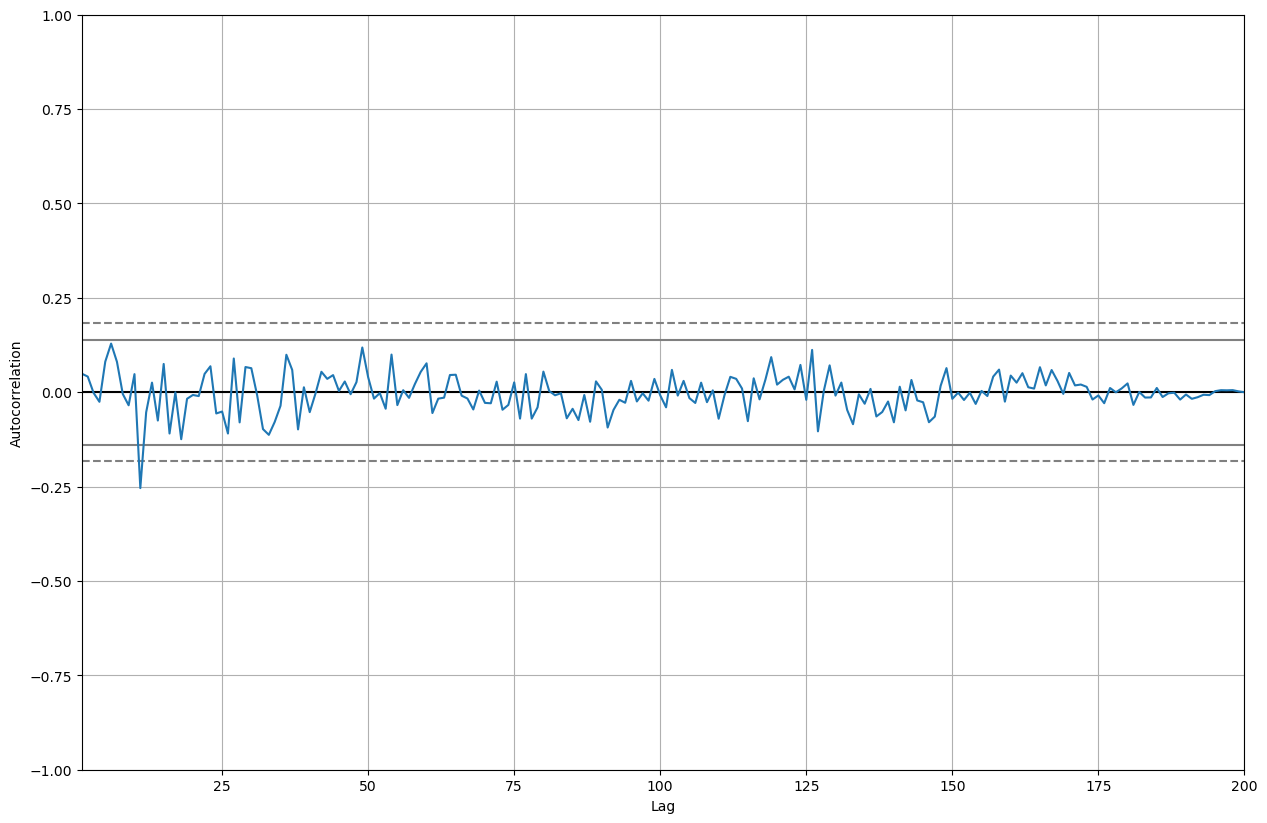

In [228]:
plt.figure(figsize=(15,10), dpi= 100)
pd.plotting.autocorrelation_plot(d1_1.loc['2015-01-01 06:00:00': '2015-01-01 7:00:00', 'rotate']);

The dotted lines in the above plot actually tell you about the statistical significance of the correlation. Each spike that rises above or falls below the dashed lines is considered to be statistically significant.


Monthly max

In [16]:
d_columns = ["volt","rotate","pressure","vibration"]
data_M_max = d1_1[d_columns].resample('M').max() # Observe the data is weekly here
print(data_M_max.head())
print(data_M_max.shape)

                  volt      rotate    pressure  vibration
datetime                                                 
2015-01-31  237.938518  655.697385  166.362842  70.587984
2015-02-28  246.419957  665.434290  160.087734  73.948949
2015-03-31  242.703802  663.254399  171.311887  69.948391
2015-04-30  246.497613  662.874755  185.951998  71.182495
2015-05-31  250.870453  651.014112  170.603170  71.949134
(13, 4)


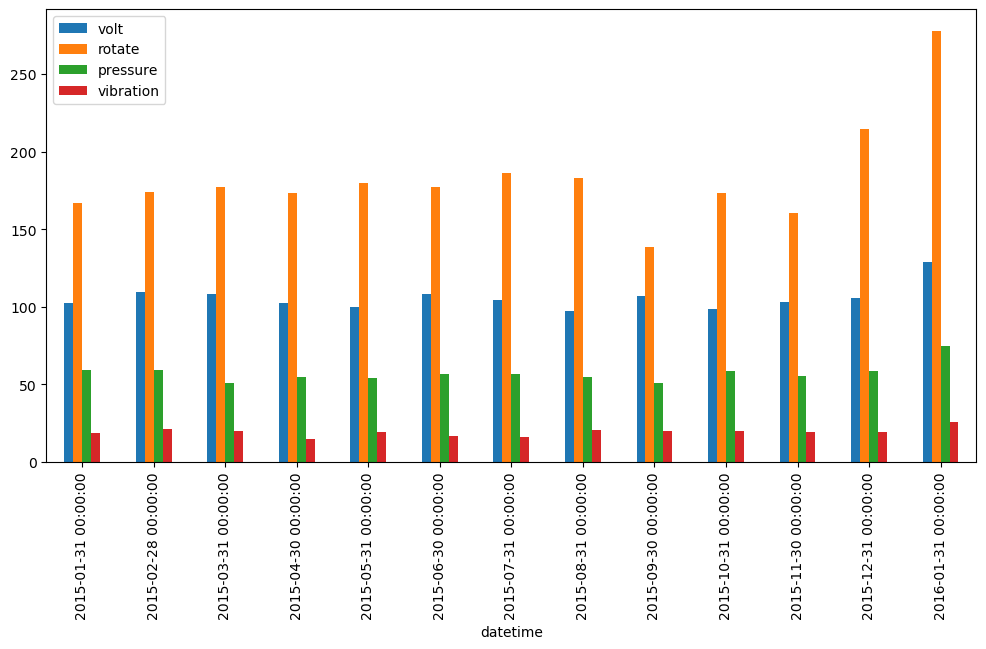

In [349]:
data_M_max.plot(kind='bar', figsize=(12,6), stacked=False)

Monthly Min

In [353]:
d_columns = ["volt","rotate","pressure","vibration"]
data_M_min = d1_1[d_columns].resample('M').min() # Observe the data is weekly here
print(data_M_min.head())
print(data_M_min.shape)

                  volt      rotate   pressure  vibration
datetime                                                
2015-01-31  102.366387  167.099106  59.354028  19.001969
2015-02-28  109.550525  174.126968  59.590298  21.097481
2015-03-31  108.428230  177.225652  51.254043  20.015999
2015-04-30  102.644146  173.633781  55.066651  14.877054
2015-05-31  100.194137  179.653881  54.170030  19.237552
(13, 4)


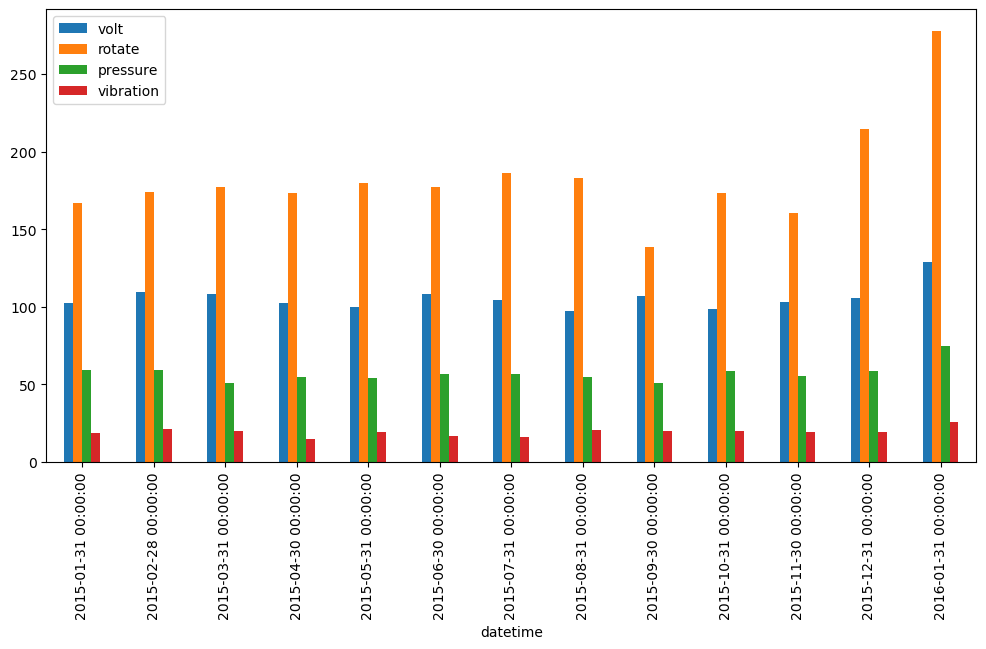

In [359]:
data_M_min.plot(kind='bar', figsize=(12,6), stacked=False)

## Data set 2 - Error ID in machines

In [17]:
d2=pd.read_csv("data_set2.csv")
d2["datetime"]= pd.to_datetime(d2['datetime'])
# d2["errorID"] = d2["errorID"].astype("str")
print(d2.dtypes)
print(d2[d2.duplicated()==True])
print(d2["errorID"].unique())
d2

datetime     datetime64[ns]
machineID             int64
errorID              object
dtype: object
Empty DataFrame
Columns: [datetime, machineID, errorID]
Index: []
['error1' 'error3' 'error5' 'error4' 'error2']


datetime  machineID errorID
0    2015-01-03 07:00:00          1  error1
1    2015-01-03 20:00:00          1  error3
2    2015-01-04 06:00:00          1  error5
3    2015-01-10 15:00:00          1  error4
4    2015-01-22 10:00:00          1  error4
...                  ...        ...     ...
3914 2015-11-21 08:00:00        100  error2
3915 2015-12-04 02:00:00        100  error1
3916 2015-12-08 06:00:00        100  error2
3917 2015-12-08 06:00:00        100  error3
3918 2015-12-22 03:00:00        100  error3

[3919 rows x 3 columns]

### Basic Analysis on data set 2

[Text(0, 0.5, 'Frequency'), Text(0.5, 1.0, 'Frequency Histogram of error ID')]

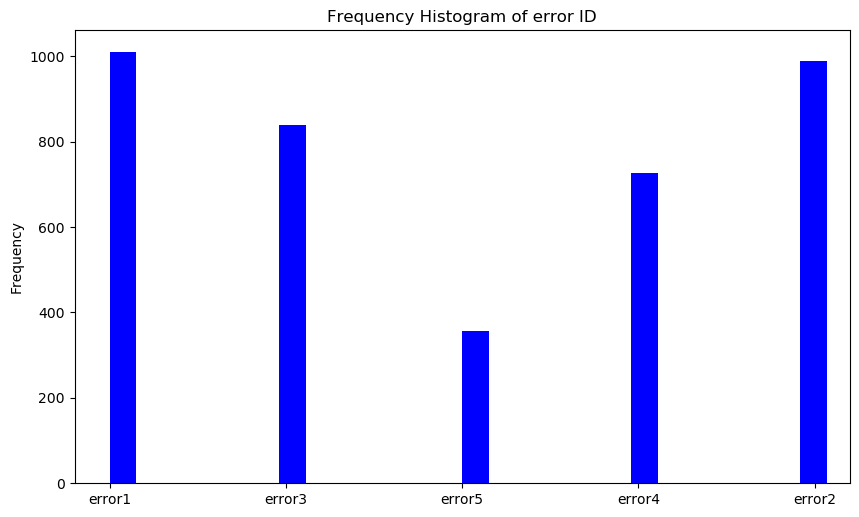

In [355]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':100})

# Plot Histogram on x
x = d2["errorID"]
plt.hist(x, bins=50, width=0.15, color="blue")
plt.gca().set(title='Frequency Histogram of error ID', ylabel='Frequency')

In [59]:
# data2=d2.groupby(["datetime","machineID"])['errorID'].apply(lambda group_series: group_series.to_list()).reset_index()

In [60]:
# data2

datetime  machineID   errorID
0    2015-01-01 06:00:00         24  [error1]
1    2015-01-01 06:00:00         73  [error4]
2    2015-01-01 06:00:00         81  [error1]
3    2015-01-01 07:00:00         43  [error3]
4    2015-01-01 08:00:00         14  [error4]
...                  ...        ...       ...
3611 2015-12-31 18:00:00         91  [error4]
3612 2015-12-31 20:00:00         23  [error3]
3613 2015-12-31 23:00:00         94  [error3]
3614 2016-01-01 05:00:00          8  [error3]
3615 2016-01-01 05:00:00         30  [error2]

[3616 rows x 3 columns]

In [62]:
# d2_2 = data2.set_index('datetime')
# print(d2_2)
# print(d2_2.dtypes)

                     machineID   errorID
datetime                                
2015-01-01 06:00:00         24  [error1]
2015-01-01 06:00:00         73  [error4]
2015-01-01 06:00:00         81  [error1]
2015-01-01 07:00:00         43  [error3]
2015-01-01 08:00:00         14  [error4]
...                        ...       ...
2015-12-31 18:00:00         91  [error4]
2015-12-31 20:00:00         23  [error3]
2015-12-31 23:00:00         94  [error3]
2016-01-01 05:00:00          8  [error3]
2016-01-01 05:00:00         30  [error2]

[3616 rows x 2 columns]
machineID     int64
errorID      object
dtype: object


In [63]:
# d2_2["errorID"]= d2["errorID"].astype('str')
# print(d2_2.dtypes)

machineID     int64
errorID      object
dtype: object


In [228]:
# from sklearn.preprocessing import LabelBinarizer

In [234]:
# d2_2= pd.DataFrame(LabelBinarizer().fit_transform(d2.errorID))
# d2_2

0  1  2  3  4
0     1  0  0  0  0
1     0  0  1  0  0
2     0  0  0  0  1
3     0  0  0  1  0
4     0  0  0  1  0
...  .. .. .. .. ..
3914  0  1  0  0  0
3915  1  0  0  0  0
3916  0  1  0  0  0
3917  0  0  1  0  0
3918  0  0  1  0  0

[3919 rows x 5 columns]

In [271]:
# errors = pd.get_dummies(d2.set_index("datetime")).reset_index()
# errors

datetime  machineID  errorID_error1  errorID_error2  \
0    2015-01-03 07:00:00          1               1               0   
1    2015-01-03 20:00:00          1               0               0   
2    2015-01-04 06:00:00          1               0               0   
3    2015-01-10 15:00:00          1               0               0   
4    2015-01-22 10:00:00          1               0               0   
...                  ...        ...             ...             ...   
3914 2015-11-21 08:00:00        100               0               1   
3915 2015-12-04 02:00:00        100               1               0   
3916 2015-12-08 06:00:00        100               0               1   
3917 2015-12-08 06:00:00        100               0               0   
3918 2015-12-22 03:00:00        100               0               0   

      errorID_error3  errorID_error4  errorID_error5  
0                  0               0               0  
1                  1               0               0  
2                  0               0               1  
3                  0               1               0  
4                  0               1               0  
...              ...             ...             ...  
3914               0               0               0  
3915               0               0               0  
3916               0               0               0  
3917               1               0               0  
3918               1               0               0  

[3919 rows x 7 columns]

In [272]:
# errors.columns = ["datetime","machineID","error1","error2","error3","error4","error5"]
# errors.columns

Index(['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4',
       'error5'],
      dtype='object')

In [301]:
# error11= errors.groupby(["machineID","datetime"]).sum().reset_index()
# error11.head(13)

machineID            datetime  error1  error2  error3  error4  error5
0           1 2015-01-03 07:00:00       1       0       0       0       0
1           1 2015-01-03 20:00:00       0       0       1       0       0
2           1 2015-01-04 06:00:00       0       0       0       0       1
3           1 2015-01-10 15:00:00       0       0       0       1       0
4           1 2015-01-22 10:00:00       0       0       0       1       0
5           1 2015-01-25 15:00:00       0       0       0       1       0
6           1 2015-01-27 04:00:00       1       0       0       0       0
7           1 2015-03-03 22:00:00       0       1       0       0       0
8           1 2015-03-05 06:00:00       1       0       0       0       0
9           1 2015-03-20 18:00:00       1       0       0       0       0
10          1 2015-03-26 01:00:00       0       1       0       0       0
11          1 2015-03-31 23:00:00       1       0       0       0       0
12          1 2015-04-19 06:00:00       0       1       1       0       0

#### Separating the errors in sepatate columns- One-Hot Encoding

In [23]:
d2_errorid = pd.get_dummies(d2.set_index("datetime")).reset_index()
d2_errorid

"""Here the datetime is set as index & rest two columns, "machineID" & "error-Id" remains.
- the get_dummies applies to only categorical fuction & thus, errorID being one gets separated 
automatically since machineID is "int type" so not taken into consideration."""

datetime  machineID  errorID_error1  errorID_error2  \
0    2015-01-03 07:00:00          1               1               0   
1    2015-01-03 20:00:00          1               0               0   
2    2015-01-04 06:00:00          1               0               0   
3    2015-01-10 15:00:00          1               0               0   
4    2015-01-22 10:00:00          1               0               0   
...                  ...        ...             ...             ...   
3914 2015-11-21 08:00:00        100               0               1   
3915 2015-12-04 02:00:00        100               1               0   
3916 2015-12-08 06:00:00        100               0               1   
3917 2015-12-08 06:00:00        100               0               0   
3918 2015-12-22 03:00:00        100               0               0   

      errorID_error3  errorID_error4  errorID_error5  
0                  0               0               0  
1                  1               0               0  
2                  0               0               1  
3                  0               1               0  
4                  0               1               0  
...              ...             ...             ...  
3914               0               0               0  
3915               0               0               0  
3916               0               0               0  
3917               1               0               0  
3918               1               0               0  

[3919 rows x 7 columns]

In [20]:
d2_errorid.columns = ["datetime","machineID","error1","error2","error3","error4","error5"]
d2_errorid.columns

Index(['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4',
       'error5'],
      dtype='object')

In [22]:
d2_errorid_data = d2_errorid.groupby(["machineID","datetime"]).sum().reset_index()
d2_errorid_data.head(13)

""""Here the sum() joins the multiple lines with same datetime & difffrent errors into one single row"""

machineID            datetime  error1  error2  error3  error4  error5
0           1 2015-01-03 07:00:00       1       0       0       0       0
1           1 2015-01-03 20:00:00       0       0       1       0       0
2           1 2015-01-04 06:00:00       0       0       0       0       1
3           1 2015-01-10 15:00:00       0       0       0       1       0
4           1 2015-01-22 10:00:00       0       0       0       1       0
5           1 2015-01-25 15:00:00       0       0       0       1       0
6           1 2015-01-27 04:00:00       1       0       0       0       0
7           1 2015-03-03 22:00:00       0       1       0       0       0
8           1 2015-03-05 06:00:00       1       0       0       0       0
9           1 2015-03-20 18:00:00       1       0       0       0       0
10          1 2015-03-26 01:00:00       0       1       0       0       0
11          1 2015-03-31 23:00:00       1       0       0       0       0
12          1 2015-04-19 06:00:00       0       1       1       0       0

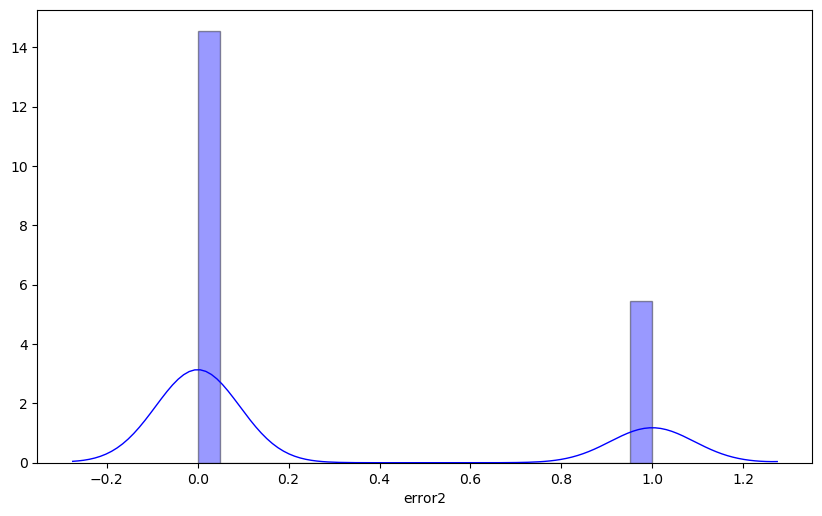

In [51]:
import seaborn as sns
sns.distplot(d2_errorid_data["error2"], hist=True, kde=True,
             bins=20,              
             color = 'blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})

## Dtata set 3- failure of components

In [52]:
d3=pd.read_csv("data_set3.csv")#, header=0, names=["datetime", "machineID","failure"])
d3["datetime"]= pd.to_datetime((d3['datetime']))
print(d3[d3.duplicated()==True])
print(d3["failure"].unique())
d3

Empty DataFrame
Columns: [datetime, machineID, failure]
Index: []
['comp4' 'comp1' 'comp2' 'comp3']


datetime  machineID failure
0   2015-01-05 06:00:00          1   comp4
1   2015-03-06 06:00:00          1   comp1
2   2015-04-20 06:00:00          1   comp2
3   2015-06-19 06:00:00          1   comp4
4   2015-09-02 06:00:00          1   comp4
..                  ...        ...     ...
756 2015-11-29 06:00:00         99   comp3
757 2015-12-14 06:00:00         99   comp4
758 2015-02-12 06:00:00        100   comp1
759 2015-09-10 06:00:00        100   comp1
760 2015-12-09 06:00:00        100   comp2

[761 rows x 3 columns]

Keeping in a list in last column

In [53]:
data3=d3.groupby(["datetime","machineID"])['failure'].apply(lambda group_series: group_series.to_list()).reset_index()

In [54]:
data3

datetime  machineID         failure
0   2015-01-02 03:00:00         16  [comp1, comp3]
1   2015-01-02 03:00:00         17         [comp4]
2   2015-01-02 03:00:00         22         [comp1]
3   2015-01-02 03:00:00         35         [comp1]
4   2015-01-02 03:00:00         45         [comp1]
..                  ...        ...             ...
714 2015-12-30 06:00:00         88         [comp1]
715 2015-12-31 06:00:00         15         [comp4]
716 2015-12-31 06:00:00         64         [comp1]
717 2015-12-31 06:00:00         90         [comp1]
718 2015-12-31 06:00:00         95         [comp1]

[719 rows x 3 columns]

In [55]:
d3_3 = data3.set_index('datetime')
print(d3_3)
print(d3_3.dtypes)

                     machineID         failure
datetime                                      
2015-01-02 03:00:00         16  [comp1, comp3]
2015-01-02 03:00:00         17         [comp4]
2015-01-02 03:00:00         22         [comp1]
2015-01-02 03:00:00         35         [comp1]
2015-01-02 03:00:00         45         [comp1]
...                        ...             ...
2015-12-30 06:00:00         88         [comp1]
2015-12-31 06:00:00         15         [comp4]
2015-12-31 06:00:00         64         [comp1]
2015-12-31 06:00:00         90         [comp1]
2015-12-31 06:00:00         95         [comp1]

[719 rows x 2 columns]
machineID     int64
failure      object
dtype: object


In [35]:
# d3_3["failure"]= d3["failure"].astype('str')
# print(d3_3.dtypes)

machineID     int64
failure      object
dtype: object


#### Separating the failure components in sepatate columns- One-Hot Encoding

In [25]:
d3_failcomp = pd.get_dummies(d3.set_index("datetime")).reset_index()
d3_failcomp

datetime  machineID  failure_comp1  failure_comp2  \
0   2015-01-05 06:00:00          1              0              0   
1   2015-03-06 06:00:00          1              1              0   
2   2015-04-20 06:00:00          1              0              1   
3   2015-06-19 06:00:00          1              0              0   
4   2015-09-02 06:00:00          1              0              0   
..                  ...        ...            ...            ...   
756 2015-11-29 06:00:00         99              0              0   
757 2015-12-14 06:00:00         99              0              0   
758 2015-02-12 06:00:00        100              1              0   
759 2015-09-10 06:00:00        100              1              0   
760 2015-12-09 06:00:00        100              0              1   

     failure_comp3  failure_comp4  
0                0              1  
1                0              0  
2                0              0  
3                0              1  
4                0              1  
..             ...            ...  
756              1              0  
757              0              1  
758              0              0  
759              0              0  
760              0              0  

[761 rows x 6 columns]

In [26]:
d3_compfail_data = d3_failcomp.groupby(["machineID","datetime"]).sum().reset_index()
d3_compfail_data

machineID            datetime  failure_comp1  failure_comp2  \
0            1 2015-01-05 06:00:00              0              0   
1            1 2015-03-06 06:00:00              1              0   
2            1 2015-04-20 06:00:00              0              1   
3            1 2015-06-19 06:00:00              0              0   
4            1 2015-09-02 06:00:00              0              0   
..         ...                 ...            ...            ...   
714         99 2015-11-29 06:00:00              0              0   
715         99 2015-12-14 06:00:00              0              0   
716        100 2015-02-12 06:00:00              1              0   
717        100 2015-09-10 06:00:00              1              0   
718        100 2015-12-09 06:00:00              0              1   

     failure_comp3  failure_comp4  
0                0              1  
1                0              0  
2                0              0  
3                0              1  
4                0              1  
..             ...            ...  
714              1              0  
715              0              1  
716              0              0  
717              0              0  
718              0              0  

[719 rows x 6 columns]


## Basic Analysis of Data set 3

In [27]:
d3["failure"].unique()

array(['comp4', 'comp1', 'comp2', 'comp3'], dtype=object)

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Frequency Histogram of component failure')]

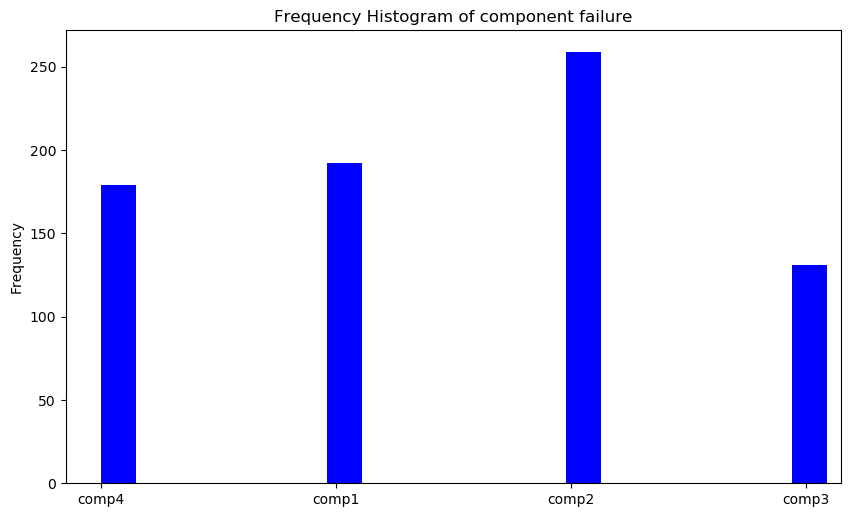

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':100})

# Plot Histogram on x
x = d3["failure"]
plt.hist(x, bins=50, width=0.15, color="blue")
plt.gca().set(title='Frequency Histogram of component failure', ylabel='Frequency')

## Data set 4 - Model & Age of machines

In [29]:
d4=pd.read_csv("data_set4.csv")
print(d4)
print(d4[d4.duplicated()==True])
print(d4.describe())

    machineID   model  age
0           1  model3   18
1           2  model4    7
2           3  model3    8
3           4  model3    7
4           5  model3    2
..        ...     ...  ...
95         96  model2   10
96         97  model2   14
97         98  model2   20
98         99  model1   14
99        100  model4    5

[100 rows x 3 columns]
Empty DataFrame
Columns: [machineID, model, age]
Index: []
        machineID         age
count  100.000000  100.000000
mean    50.500000   11.330000
std     29.011492    5.856974
min      1.000000    0.000000
25%     25.750000    6.750000
50%     50.500000   12.000000
75%     75.250000   16.000000
max    100.000000   20.000000


This file basically tells you about the Model number & age of each type of machine

## Data set 5 - Components in machines

In [30]:
d5=pd.read_csv("data_set5.csv", header=0, names=["datetime","machineID","comp"])
d5["datetime"]= pd.to_datetime((d5['datetime']))
print(d5[d5.duplicated()==True])
print(d5["comp"].unique())
d5

Empty DataFrame
Columns: [datetime, machineID, comp]
Index: []
['comp4' 'comp1' 'comp3' 'comp2']


datetime  machineID   comp
0    2015-05-01 06:00:00          1  comp4
1    2015-05-01 06:00:00          1  comp1
2    2015-01-20 06:00:00          1  comp3
3    2015-01-20 06:00:00          1  comp1
4    2015-04-02 06:00:00          1  comp4
...                  ...        ...    ...
2881 2015-10-10 06:00:00        100  comp3
2882 2015-10-25 06:00:00        100  comp4
2883 2015-09-11 06:00:00        100  comp4
2884 2015-09-12 06:00:00        100  comp2
2885 2015-12-24 06:00:00        100  comp2

[2886 rows x 3 columns]

In [31]:
d5_comp = pd.get_dummies(d5.set_index("datetime")).reset_index()
d5_comp

datetime  machineID  comp_comp1  comp_comp2  comp_comp3  \
0    2015-05-01 06:00:00          1           0           0           0   
1    2015-05-01 06:00:00          1           1           0           0   
2    2015-01-20 06:00:00          1           0           0           1   
3    2015-01-20 06:00:00          1           1           0           0   
4    2015-04-02 06:00:00          1           0           0           0   
...                  ...        ...         ...         ...         ...   
2881 2015-10-10 06:00:00        100           0           0           1   
2882 2015-10-25 06:00:00        100           0           0           0   
2883 2015-09-11 06:00:00        100           0           0           0   
2884 2015-09-12 06:00:00        100           0           1           0   
2885 2015-12-24 06:00:00        100           0           1           0   

      comp_comp4  
0              1  
1              0  
2              0  
3              0  
4              1  
...          ...  
2881           0  
2882           1  
2883           1  
2884           0  
2885           0  

[2886 rows x 6 columns]

In [32]:
d5_comp.columns = ["datetime","machineID","comp1","comp2","comp3","comp4"]
d5_comp.columns

Index(['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4'], dtype='object')

In [33]:
d5_comp_data = d5_comp.groupby(["machineID","datetime"]).sum().reset_index()
d5_comp_data.head()

machineID            datetime  comp1  comp2  comp3  comp4
0          1 2015-01-11 06:00:00      0      1      0      1
1          1 2015-01-12 06:00:00      0      0      1      0
2          1 2015-01-20 06:00:00      1      0      1      0
3          1 2015-02-09 06:00:00      1      0      0      1
4          1 2015-02-10 06:00:00      1      0      0      1

In [69]:
# d5_5["comp"]= d2["comp"].astype('str')
# print(d5_5.dtypes)

In [40]:
# data5=d5.groupby(["datetime","machineID"])['comp'].apply(lambda group_series: group_series.to_list()).reset_index()
# data5

datetime  machineID            comp
0    2015-01-01 06:00:00         14         [comp1]
1    2015-01-01 06:00:00         17         [comp4]
2    2015-01-01 06:00:00         34  [comp1, comp2]
3    2015-01-01 06:00:00         51  [comp1, comp3]
4    2015-01-01 06:00:00         65         [comp1]
...                  ...        ...             ...
2158 2016-01-01 06:00:00         35         [comp2]
2159 2016-01-01 06:00:00         42         [comp4]
2160 2016-01-01 06:00:00         43         [comp1]
2161 2016-01-01 06:00:00         55         [comp3]
2162 2016-01-01 06:00:00         78         [comp3]

[2163 rows x 3 columns]

In [41]:
# d5_5 = data5.set_index('datetime')
# print(d5_5)
# print(d5_5.dtypes)

                     machineID            comp
datetime                                      
2015-01-01 06:00:00         14         [comp1]
2015-01-01 06:00:00         17         [comp4]
2015-01-01 06:00:00         34  [comp1, comp2]
2015-01-01 06:00:00         51  [comp1, comp3]
2015-01-01 06:00:00         65         [comp1]
...                        ...             ...
2016-01-01 06:00:00         35         [comp2]
2016-01-01 06:00:00         42         [comp4]
2016-01-01 06:00:00         43         [comp1]
2016-01-01 06:00:00         55         [comp3]
2016-01-01 06:00:00         78         [comp3]

[2163 rows x 2 columns]
machineID     int64
comp         object
dtype: object


### Basic analysis on data 5

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Frequency Histogram of component in machines')]

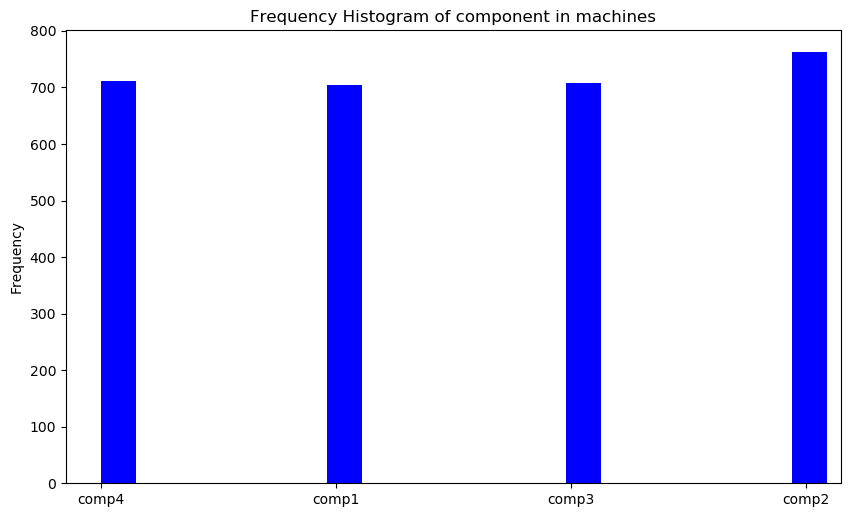

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':100})

# Plot Histogram on x
x = d5["comp"]
plt.hist(x, bins=50, width=0.15, color="blue")
plt.gca().set(title='Frequency Histogram of component in machines', ylabel='Frequency')

# Combinig the data set 


In [35]:
print(d1_1.head())
print(d1_1.shape)
print(d1_1.dtypes)

                     machineID        volt      rotate    pressure  vibration
datetime                                                                     
2015-01-01 06:00:00          1  176.217853  418.504078  113.077935  45.087686
2015-01-01 07:00:00          1  162.879223  402.747490   95.460525  43.413973
2015-01-01 08:00:00          1  170.989902  527.349825   75.237905  34.178847
2015-01-01 09:00:00          1  162.462833  346.149335  109.248561  41.122144
2015-01-01 10:00:00          1  157.610021  435.376873  111.886648  25.990511
(876100, 5)
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object


In [36]:
print(d2_errorid_data.head())
print(d2_errorid_data.shape)
print(d2_errorid_data.dtypes)

   machineID            datetime  error1  error2  error3  error4  error5
0          1 2015-01-03 07:00:00       1       0       0       0       0
1          1 2015-01-03 20:00:00       0       0       1       0       0
2          1 2015-01-04 06:00:00       0       0       0       0       1
3          1 2015-01-10 15:00:00       0       0       0       1       0
4          1 2015-01-22 10:00:00       0       0       0       1       0
(3616, 7)
machineID             int64
datetime     datetime64[ns]
error1                uint8
error2                uint8
error3                uint8
error4                uint8
error5                uint8
dtype: object


In [37]:
print(d3_compfail_data.head())
print(d3_compfail_data.shape)
print(d3_compfail_data.dtypes)

   machineID            datetime  failure_comp1  failure_comp2  failure_comp3  \
0          1 2015-01-05 06:00:00              0              0              0   
1          1 2015-03-06 06:00:00              1              0              0   
2          1 2015-04-20 06:00:00              0              1              0   
3          1 2015-06-19 06:00:00              0              0              0   
4          1 2015-09-02 06:00:00              0              0              0   

   failure_comp4  
0              1  
1              0  
2              0  
3              1  
4              1  
(719, 6)
machineID                 int64
datetime         datetime64[ns]
failure_comp1             uint8
failure_comp2             uint8
failure_comp3             uint8
failure_comp4             uint8
dtype: object


In [38]:
print(d4.head())
print(d4.shape)

   machineID   model  age
0          1  model3   18
1          2  model4    7
2          3  model3    8
3          4  model3    7
4          5  model3    2
(100, 3)


In [39]:
print(d5_comp_data.head())
print(d5_comp_data.shape)
print(d5_comp_data.dtypes)

   machineID            datetime  comp1  comp2  comp3  comp4
0          1 2015-01-11 06:00:00      0      1      0      1
1          1 2015-01-12 06:00:00      0      0      1      0
2          1 2015-01-20 06:00:00      1      0      1      0
3          1 2015-02-09 06:00:00      1      0      0      1
4          1 2015-02-10 06:00:00      1      0      0      1
(2163, 6)
machineID             int64
datetime     datetime64[ns]
comp1                 uint8
comp2                 uint8
comp3                 uint8
comp4                 uint8
dtype: object


In [40]:
m1=pd.merge(d1_1, d2_errorid_data, how='left', on=["machineID","datetime"])
m1

machineID            datetime        volt      rotate    pressure  \
0               1 2015-01-01 06:00:00  176.217853  418.504078  113.077935   
1               1 2015-01-01 07:00:00  162.879223  402.747490   95.460525   
2               1 2015-01-01 08:00:00  170.989902  527.349825   75.237905   
3               1 2015-01-01 09:00:00  162.462833  346.149335  109.248561   
4               1 2015-01-01 10:00:00  157.610021  435.376873  111.886648   
...           ...                 ...         ...         ...         ...   
876095        100 2016-01-01 02:00:00  179.438162  395.222827  102.290715   
876096        100 2016-01-01 03:00:00  189.617555  446.207972   98.180607   
876097        100 2016-01-01 04:00:00  192.483414  447.816524   94.132837   
876098        100 2016-01-01 05:00:00  165.475310  413.771670  104.081073   
876099        100 2016-01-01 06:00:00  171.336037  496.096870   79.095538   

        vibration  error1  error2  error3  error4  error5  
0       45.087686     NaN     NaN     NaN     NaN     NaN  
1       43.413973     NaN     NaN     NaN     NaN     NaN  
2       34.178847     NaN     NaN     NaN     NaN     NaN  
3       41.122144     NaN     NaN     NaN     NaN     NaN  
4       25.990511     NaN     NaN     NaN     NaN     NaN  
...           ...     ...     ...     ...     ...     ...  
876095  50.771941     NaN     NaN     NaN     NaN     NaN  
876096  35.123072     NaN     NaN     NaN     NaN     NaN  
876097  48.314561     NaN     NaN     NaN     NaN     NaN  
876098  44.835259     NaN     NaN     NaN     NaN     NaN  
876099  37.845245     NaN     NaN     NaN     NaN     NaN  

[876100 rows x 11 columns]

In [130]:
# m2= pd.merge(m1, d3_compfail_data, how='left', on=["machineID","datetime"])
# m2

machineID            datetime        volt      rotate    pressure  \
0               1 2015-01-01 06:00:00  176.217853  418.504078  113.077935   
1               1 2015-01-01 07:00:00  162.879223  402.747490   95.460525   
2               1 2015-01-01 08:00:00  170.989902  527.349825   75.237905   
3               1 2015-01-01 09:00:00  162.462833  346.149335  109.248561   
4               1 2015-01-01 10:00:00  157.610021  435.376873  111.886648   
...           ...                 ...         ...         ...         ...   
876095        100 2016-01-01 02:00:00  179.438162  395.222827  102.290715   
876096        100 2016-01-01 03:00:00  189.617555  446.207972   98.180607   
876097        100 2016-01-01 04:00:00  192.483414  447.816524   94.132837   
876098        100 2016-01-01 05:00:00  165.475310  413.771670  104.081073   
876099        100 2016-01-01 06:00:00  171.336037  496.096870   79.095538   

        vibration  error1  error2  error3  error4  error5  failure_comp1  \
0       45.087686     NaN     NaN     NaN     NaN     NaN            NaN   
1       43.413973     NaN     NaN     NaN     NaN     NaN            NaN   
2       34.178847     NaN     NaN     NaN     NaN     NaN            NaN   
3       41.122144     NaN     NaN     NaN     NaN     NaN            NaN   
4       25.990511     NaN     NaN     NaN     NaN     NaN            NaN   
...           ...     ...     ...     ...     ...     ...            ...   
876095  50.771941     NaN     NaN     NaN     NaN     NaN            NaN   
876096  35.123072     NaN     NaN     NaN     NaN     NaN            NaN   
876097  48.314561     NaN     NaN     NaN     NaN     NaN            NaN   
876098  44.835259     NaN     NaN     NaN     NaN     NaN            NaN   
876099  37.845245     NaN     NaN     NaN     NaN     NaN            NaN   

        failure_comp2  failure_comp3  failure_comp4  
0                 NaN            NaN            NaN  
1                 NaN            NaN            NaN  
2                 NaN            NaN            NaN  
3                 NaN            NaN            NaN  
4                 NaN            NaN            NaN  
...               ...            ...            ...  
876095            NaN            NaN            NaN  
876096            NaN            NaN            NaN  
876097            NaN            NaN            NaN  
876098            NaN            NaN            NaN  
876099            NaN            NaN            NaN  

[876100 rows x 15 columns]

In [56]:
m2= pd.merge(m1, d3_3, how='left', on=["machineID","datetime"])
m2

machineID            datetime        volt      rotate    pressure  \
0               1 2015-01-01 06:00:00  176.217853  418.504078  113.077935   
1               1 2015-01-01 07:00:00  162.879223  402.747490   95.460525   
2               1 2015-01-01 08:00:00  170.989902  527.349825   75.237905   
3               1 2015-01-01 09:00:00  162.462833  346.149335  109.248561   
4               1 2015-01-01 10:00:00  157.610021  435.376873  111.886648   
...           ...                 ...         ...         ...         ...   
876095        100 2016-01-01 02:00:00  179.438162  395.222827  102.290715   
876096        100 2016-01-01 03:00:00  189.617555  446.207972   98.180607   
876097        100 2016-01-01 04:00:00  192.483414  447.816524   94.132837   
876098        100 2016-01-01 05:00:00  165.475310  413.771670  104.081073   
876099        100 2016-01-01 06:00:00  171.336037  496.096870   79.095538   

        vibration  error1  error2  error3  error4  error5 failure  
0       45.087686     NaN     NaN     NaN     NaN     NaN     NaN  
1       43.413973     NaN     NaN     NaN     NaN     NaN     NaN  
2       34.178847     NaN     NaN     NaN     NaN     NaN     NaN  
3       41.122144     NaN     NaN     NaN     NaN     NaN     NaN  
4       25.990511     NaN     NaN     NaN     NaN     NaN     NaN  
...           ...     ...     ...     ...     ...     ...     ...  
876095  50.771941     NaN     NaN     NaN     NaN     NaN     NaN  
876096  35.123072     NaN     NaN     NaN     NaN     NaN     NaN  
876097  48.314561     NaN     NaN     NaN     NaN     NaN     NaN  
876098  44.835259     NaN     NaN     NaN     NaN     NaN     NaN  
876099  37.845245     NaN     NaN     NaN     NaN     NaN     NaN  

[876100 rows x 12 columns]

In [57]:
m2["error1"].unique()

array([nan,  0.,  1.])

Separated failure data set

In [132]:
# m3= pd.merge(d4,m2, how='left', on=["machineID"])
# m3

machineID   model  age            datetime        volt      rotate  \
0               1  model3   18 2015-01-01 06:00:00  176.217853  418.504078   
1               1  model3   18 2015-01-01 07:00:00  162.879223  402.747490   
2               1  model3   18 2015-01-01 08:00:00  170.989902  527.349825   
3               1  model3   18 2015-01-01 09:00:00  162.462833  346.149335   
4               1  model3   18 2015-01-01 10:00:00  157.610021  435.376873   
...           ...     ...  ...                 ...         ...         ...   
876095        100  model4    5 2016-01-01 02:00:00  179.438162  395.222827   
876096        100  model4    5 2016-01-01 03:00:00  189.617555  446.207972   
876097        100  model4    5 2016-01-01 04:00:00  192.483414  447.816524   
876098        100  model4    5 2016-01-01 05:00:00  165.475310  413.771670   
876099        100  model4    5 2016-01-01 06:00:00  171.336037  496.096870   

          pressure  vibration  error1  error2  error3  error4  error5  \
0       113.077935  45.087686     NaN     NaN     NaN     NaN     NaN   
1        95.460525  43.413973     NaN     NaN     NaN     NaN     NaN   
2        75.237905  34.178847     NaN     NaN     NaN     NaN     NaN   
3       109.248561  41.122144     NaN     NaN     NaN     NaN     NaN   
4       111.886648  25.990511     NaN     NaN     NaN     NaN     NaN   
...            ...        ...     ...     ...     ...     ...     ...   
876095  102.290715  50.771941     NaN     NaN     NaN     NaN     NaN   
876096   98.180607  35.123072     NaN     NaN     NaN     NaN     NaN   
876097   94.132837  48.314561     NaN     NaN     NaN     NaN     NaN   
876098  104.081073  44.835259     NaN     NaN     NaN     NaN     NaN   
876099   79.095538  37.845245     NaN     NaN     NaN     NaN     NaN   

        failure_comp1  failure_comp2  failure_comp3  failure_comp4  
0                 NaN            NaN            NaN            NaN  
1                 NaN            NaN            NaN            NaN  
2                 NaN            NaN            NaN            NaN  
3                 NaN            NaN            NaN            NaN  
4                 NaN            NaN            NaN            NaN  
...               ...            ...            ...            ...  
876095            NaN            NaN            NaN            NaN  
876096            NaN            NaN            NaN            NaN  
876097            NaN            NaN            NaN            NaN  
876098            NaN            NaN            NaN            NaN  
876099            NaN            NaN            NaN            NaN  

[876100 rows x 17 columns]

Failure data in one column

In [59]:
# m3= pd.merge(d4,m2, how='left', on=["machineID"])
# m3

machineID   model  age            datetime        volt      rotate  \
0               1  model3   18 2015-01-01 06:00:00  176.217853  418.504078   
1               1  model3   18 2015-01-01 07:00:00  162.879223  402.747490   
2               1  model3   18 2015-01-01 08:00:00  170.989902  527.349825   
3               1  model3   18 2015-01-01 09:00:00  162.462833  346.149335   
4               1  model3   18 2015-01-01 10:00:00  157.610021  435.376873   
...           ...     ...  ...                 ...         ...         ...   
876095        100  model4    5 2016-01-01 02:00:00  179.438162  395.222827   
876096        100  model4    5 2016-01-01 03:00:00  189.617555  446.207972   
876097        100  model4    5 2016-01-01 04:00:00  192.483414  447.816524   
876098        100  model4    5 2016-01-01 05:00:00  165.475310  413.771670   
876099        100  model4    5 2016-01-01 06:00:00  171.336037  496.096870   

          pressure  vibration  error1  error2  error3  error4  error5 failure  
0       113.077935  45.087686     NaN     NaN     NaN     NaN     NaN     NaN  
1        95.460525  43.413973     NaN     NaN     NaN     NaN     NaN     NaN  
2        75.237905  34.178847     NaN     NaN     NaN     NaN     NaN     NaN  
3       109.248561  41.122144     NaN     NaN     NaN     NaN     NaN     NaN  
4       111.886648  25.990511     NaN     NaN     NaN     NaN     NaN     NaN  
...            ...        ...     ...     ...     ...     ...     ...     ...  
876095  102.290715  50.771941     NaN     NaN     NaN     NaN     NaN     NaN  
876096   98.180607  35.123072     NaN     NaN     NaN     NaN     NaN     NaN  
876097   94.132837  48.314561     NaN     NaN     NaN     NaN     NaN     NaN  
876098  104.081073  44.835259     NaN     NaN     NaN     NaN     NaN     NaN  
876099   79.095538  37.845245     NaN     NaN     NaN     NaN     NaN     NaN  

[876100 rows x 14 columns]

In [60]:
m3["model"].unique()

array(['model3', 'model4', 'model2', 'model1'], dtype=object)

In [133]:
d3_compfail_data.head()

machineID            datetime  failure_comp1  failure_comp2  failure_comp3  \
0          1 2015-01-05 06:00:00              0              0              0   
1          1 2015-03-06 06:00:00              1              0              0   
2          1 2015-04-20 06:00:00              0              1              0   
3          1 2015-06-19 06:00:00              0              0              0   
4          1 2015-09-02 06:00:00              0              0              0   

   failure_comp4  
0              1  
1              0  
2              0  
3              1  
4              1

Separated Failure comp}

In [134]:
# m4= pd.merge(m3,d5_comp_data, how='left', on=["machineID","datetime"])
# m4

machineID   model  age            datetime        volt      rotate  \
0               1  model3   18 2015-01-01 06:00:00  176.217853  418.504078   
1               1  model3   18 2015-01-01 07:00:00  162.879223  402.747490   
2               1  model3   18 2015-01-01 08:00:00  170.989902  527.349825   
3               1  model3   18 2015-01-01 09:00:00  162.462833  346.149335   
4               1  model3   18 2015-01-01 10:00:00  157.610021  435.376873   
...           ...     ...  ...                 ...         ...         ...   
876095        100  model4    5 2016-01-01 02:00:00  179.438162  395.222827   
876096        100  model4    5 2016-01-01 03:00:00  189.617555  446.207972   
876097        100  model4    5 2016-01-01 04:00:00  192.483414  447.816524   
876098        100  model4    5 2016-01-01 05:00:00  165.475310  413.771670   
876099        100  model4    5 2016-01-01 06:00:00  171.336037  496.096870   

          pressure  vibration  error1  error2  ...  error4  error5  \
0       113.077935  45.087686     NaN     NaN  ...     NaN     NaN   
1        95.460525  43.413973     NaN     NaN  ...     NaN     NaN   
2        75.237905  34.178847     NaN     NaN  ...     NaN     NaN   
3       109.248561  41.122144     NaN     NaN  ...     NaN     NaN   
4       111.886648  25.990511     NaN     NaN  ...     NaN     NaN   
...            ...        ...     ...     ...  ...     ...     ...   
876095  102.290715  50.771941     NaN     NaN  ...     NaN     NaN   
876096   98.180607  35.123072     NaN     NaN  ...     NaN     NaN   
876097   94.132837  48.314561     NaN     NaN  ...     NaN     NaN   
876098  104.081073  44.835259     NaN     NaN  ...     NaN     NaN   
876099   79.095538  37.845245     NaN     NaN  ...     NaN     NaN   

        failure_comp1  failure_comp2  failure_comp3  failure_comp4  comp1  \
0                 NaN            NaN            NaN            NaN    NaN   
1                 NaN            NaN            NaN            NaN    NaN   
2                 NaN            NaN            NaN            NaN    NaN   
3                 NaN            NaN            NaN            NaN    NaN   
4                 NaN            NaN            NaN            NaN    NaN   
...               ...            ...            ...            ...    ...   
876095            NaN            NaN            NaN            NaN    NaN   
876096            NaN            NaN            NaN            NaN    NaN   
876097            NaN            NaN            NaN            NaN    NaN   
876098            NaN            NaN            NaN            NaN    NaN   
876099            NaN            NaN            NaN            NaN    NaN   

        comp2  comp3  comp4  
0         NaN    NaN    NaN  
1         NaN    NaN    NaN  
2         NaN    NaN    NaN  
3         NaN    NaN    NaN  
4         NaN    NaN    NaN  
...       ...    ...    ...  
876095    NaN    NaN    NaN  
876096    NaN    NaN    NaN  
876097    NaN    NaN    NaN  
876098    NaN    NaN    NaN  
876099    NaN    NaN    NaN  

[876100 rows x 21 columns]

one Failure column 

In [61]:
m4= pd.merge(m3,d5_comp_data, how='left', on=["machineID","datetime"])
m4

machineID   model  age            datetime        volt      rotate  \
0               1  model3   18 2015-01-01 06:00:00  176.217853  418.504078   
1               1  model3   18 2015-01-01 07:00:00  162.879223  402.747490   
2               1  model3   18 2015-01-01 08:00:00  170.989902  527.349825   
3               1  model3   18 2015-01-01 09:00:00  162.462833  346.149335   
4               1  model3   18 2015-01-01 10:00:00  157.610021  435.376873   
...           ...     ...  ...                 ...         ...         ...   
876095        100  model4    5 2016-01-01 02:00:00  179.438162  395.222827   
876096        100  model4    5 2016-01-01 03:00:00  189.617555  446.207972   
876097        100  model4    5 2016-01-01 04:00:00  192.483414  447.816524   
876098        100  model4    5 2016-01-01 05:00:00  165.475310  413.771670   
876099        100  model4    5 2016-01-01 06:00:00  171.336037  496.096870   

          pressure  vibration  error1  error2  error3  error4  error5 failure  \
0       113.077935  45.087686     NaN     NaN     NaN     NaN     NaN     NaN   
1        95.460525  43.413973     NaN     NaN     NaN     NaN     NaN     NaN   
2        75.237905  34.178847     NaN     NaN     NaN     NaN     NaN     NaN   
3       109.248561  41.122144     NaN     NaN     NaN     NaN     NaN     NaN   
4       111.886648  25.990511     NaN     NaN     NaN     NaN     NaN     NaN   
...            ...        ...     ...     ...     ...     ...     ...     ...   
876095  102.290715  50.771941     NaN     NaN     NaN     NaN     NaN     NaN   
876096   98.180607  35.123072     NaN     NaN     NaN     NaN     NaN     NaN   
876097   94.132837  48.314561     NaN     NaN     NaN     NaN     NaN     NaN   
876098  104.081073  44.835259     NaN     NaN     NaN     NaN     NaN     NaN   
876099   79.095538  37.845245     NaN     NaN     NaN     NaN     NaN     NaN   

        comp1  comp2  comp3  comp4  
0         NaN    NaN    NaN    NaN  
1         NaN    NaN    NaN    NaN  
2         NaN    NaN    NaN    NaN  
3         NaN    NaN    NaN    NaN  
4         NaN    NaN    NaN    NaN  
...       ...    ...    ...    ...  
876095    NaN    NaN    NaN    NaN  
876096    NaN    NaN    NaN    NaN  
876097    NaN    NaN    NaN    NaN  
876098    NaN    NaN    NaN    NaN  
876099    NaN    NaN    NaN    NaN  

[876100 rows x 18 columns]

Aggregatio is not done like, combining 3 hours into one & having failure column show the comp no. which has failed maximum number of time within this 3 hours of time 

### Split the data in train & test data set (70/30)

In [63]:
X = m4.drop(['failure'],axis=1).values
y = m4['failure'].values

In [78]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [79]:
X_train.shape   # 70% of 876100 = 613270

(613270, 17)

In [80]:
X_test.shape   # 30% of 876100 = 262830

(262830, 17)

In [81]:
y_train.shape # 1dimnsional array meaning output is one column

(613270,)

In [82]:
y_test.shape

(262830,)

In [83]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics

In [ ]:
from sklearn import preprocessing
def convert(data):
    number = preprocessing.LabelEncoder()
    m4['failure'] = number.fit_transform(m4.failure)
    m4['failure'] = number.fit_transform(data.Source)
    data=data.fillna(-999)
    return data

train=convert(train)
test=convert(test)

In [85]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

ValueError: could not convert string to float: 'model2'